MAIN

In [1]:
import pandas as pd
from tensorflow.keras import layers, models 
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K


In [2]:
from Model import *
from preprocessing import *
import pandas as pd

In [3]:
df=pd.read_csv(r"E:\tensor_gpu\tensor_venv\csv\animal_csv.csv")
df.iloc[:, :-1] = df.iloc[:, :-1].astype(np.float32) #da int 64 diventano float 32, occupa la meta della ram.
#prende tutte le righe e le colonne, tranne l ultima

In [4]:
df.info() #prima era tipo 9.8 giga ora 4.8, tanto non penso servano 64 precisioni.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105174 entries, 0 to 105173
Columns: 12289 entries, 0 to label
dtypes: float32(12288), object(1)
memory usage: 4.8+ GB


In [5]:
X=df.drop(['label'], axis=1)
Y=df['label']

Split, normalizzazione, encoding

In [6]:
prep=preprocessing() 
x_train, x_test, y_train, y_test=prep.split(X=X, Y=Y, test_size=0.2, random_state=42, shuffle=True, stratify=Y)
x_train, x_test=prep.normalize(denominatore=255)
y_train_label, y_test_label=prep.le()
y_train_cat, y_test_cat=prep.ohe(num_classes=9)


Modello e valutazione

In [7]:
model=Model() 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.training(x_train=x_train, y_train_cat=y_train_cat, epochs=10, batch_size=250, validation_split=0.1)
print('test /')
model.evaluation(x_test, y_test_cat)


Epoch 1/10
303/303 [==============================] - 10s 23ms/step - loss: 1.0321 - accuracy: 0.6249 - val_loss: 0.7961 - val_accuracy: 0.7130
Epoch 2/10
303/303 [==============================] - 6s 19ms/step - loss: 0.6731 - accuracy: 0.7569 - val_loss: 0.6064 - val_accuracy: 0.7773
Epoch 3/10
303/303 [==============================] - 6s 19ms/step - loss: 0.5452 - accuracy: 0.8034 - val_loss: 0.5156 - val_accuracy: 0.8066
Epoch 4/10
303/303 [==============================] - 6s 19ms/step - loss: 0.4554 - accuracy: 0.8368 - val_loss: 0.4435 - val_accuracy: 0.8346
Epoch 5/10
303/303 [==============================] - 6s 19ms/step - loss: 0.3846 - accuracy: 0.8622 - val_loss: 0.4132 - val_accuracy: 0.8464
Epoch 6/10
303/303 [==============================] - 6s 19ms/step - loss: 0.3114 - accuracy: 0.8908 - val_loss: 0.3109 - val_accuracy: 0.8890
Epoch 7/10
303/303 [==============================] - 6s 19ms/step - loss: 0.2597 - accuracy: 0.9105 - val_loss: 0.2585 - val_accuracy: 0.912

'Test accuracy: 0.94, \n Test loss: 0.16'

In [8]:
le = LabelEncoder()
le.fit(y_test)  # es. ["cane", "gatto", "coniglio", ...]

LabelEncoder()

658/658 [==============================] - 1s 2ms/step


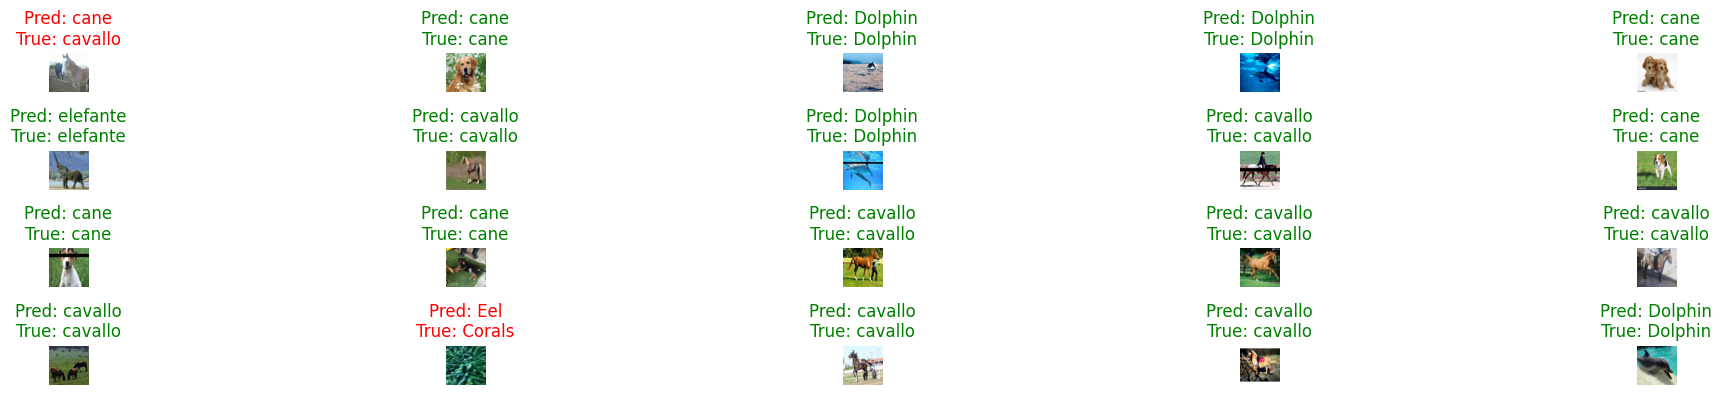

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ottieni le probabilità di predizione dal modello
pred_probs = model.predict(x_test) #predice la classe in base a x_test
pred_classes = np.argmax(pred_probs, axis=1) #prende la classe con la probabilita maggiore

#Se y_test è one-hot encoded, converti a etichette numeriche
if len(y_test_cat.shape) > 1 and y_test_cat.shape[1] > 1:
    true_classes = np.argmax(y_test_cat, axis=1)
else:
    true_classes = y_test_cat

# Visualizza 10 immagini con predizioni
num_images = 20
plt.figure(figsize=(20, 6))

for i in range(num_images): #itera su tutte le immagini scelte come 20.
    plt.subplot(6, 5, i + 1) #e crea un plot per ogni immagine, in questo caso 6 righe, 5 colonne, e indice immagine + 1
    plt.imshow(x_test[i]) #plotta l'immagine iterata
    
    pred_label = le.inverse_transform([pred_classes[i]])[0] #fa il reverse del ohe, e prende la classe predetta in stringa, classe predetta
    true_label = le.inverse_transform([true_classes[i]])[0] #stessa cosa ma con la classe giusta
    
    color = "green" if pred_label == true_label else "red" #se la classe predetta e uguale a quella vera, colore verde senno rosso
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color) #imposta il titolo, il nome della classe, predetta e quella vera
    plt.axis('off')

plt.tight_layout()
plt.show()

#su 20 immagini di 21.000 circa nel test set, accuracy test 94%, 6% errate. 
#non presenta overfitting, anche se minimo dal train epoca 10 = accuracy 95.3% - test = 94.3%
#con dati mai visti ha perso circa 1% di accuratezza.

In [ ]:
y_train.value_counts() #andrebbe fatto un bilanciamento sulle classi.

label
cane        35013
cavallo     18886
elefante    10354
Dolphin      5573
Corals       3586
Crabs        3578
Clams        3578
Eel          3571
Name: count, dtype: int64

In [13]:
model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2